<a href="https://colab.research.google.com/github/AJULUMEL/PCVK25_3F_07/blob/main/Week3_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dandi Azrul Syahputra

Nim : 2341720118

No.Absen : 07

PERCOBAAN D1

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 Mengubah tingkat kecerahan citra 
-------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3902489945.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


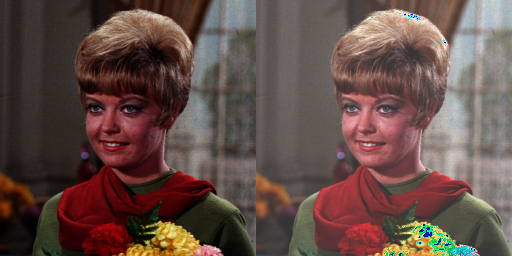

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('-------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

TUGAS PRAKTIKUM D1

1. Inverse Citra (Negatif)
--------------------------


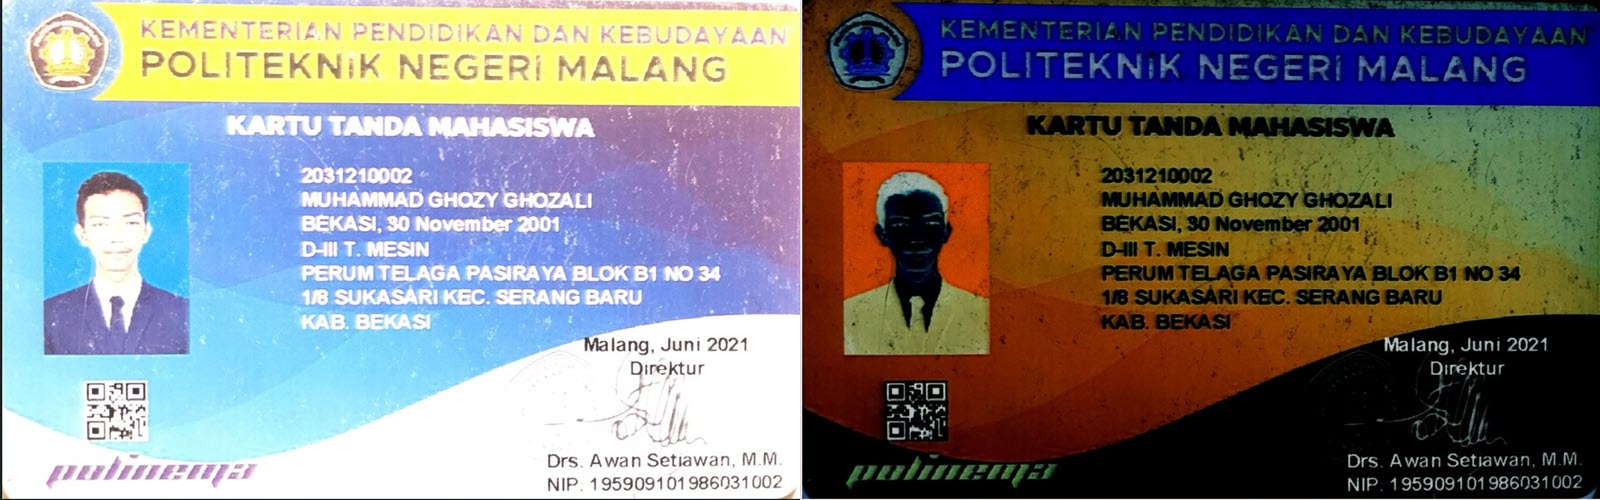

In [ ]:
print('1. Inverse Citra (Negatif)')
print('--------------------------')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/KTM lama.jpg')

# Buat array kosong
inverse_img = np.zeros(img.shape, img.dtype)

# Akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      inverse_img[y, x, c] = 255 - img[y, x, c]

# cara simple tanpa loop:
# inverse_img = 255 - img

# Gabungkan hasil
final = cv.hconcat([img, inverse_img])
cv2_imshow(final)


Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 – 255]: 50
Masukkan kontras [1.0 – 3.0]: 2


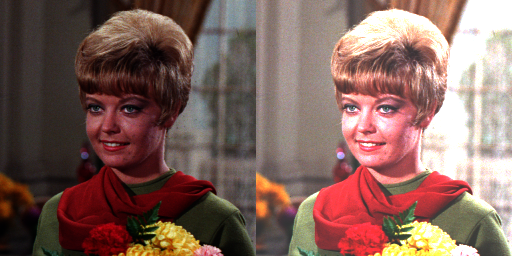

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 – 255]: '))
  contrast = float(input('Masukkan kontras [1.0 – 3.0]: '))
except ValueError:
  print('Error, input tidak valid')
  brightness = 0
  contrast = 1.0

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/female.tiff')

# Terapkan transformasi kontras + brightness
new_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      value = contrast * img[y,x,c] + brightness
      new_image[y,x,c] = np.clip(value, 0, 255)

# cara simple tanpa loop:
# new_image = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

# Gabungkan hasil
final = cv.hconcat([img, new_image])
cv2_imshow(final)


Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


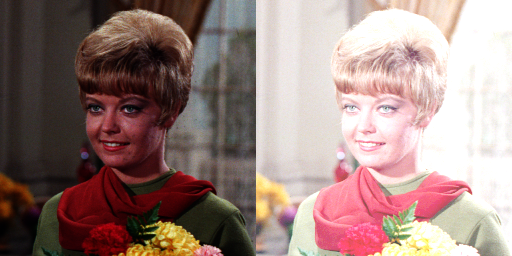

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, input tidak valid')
  brightness = 0

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/female.tiff')
log_img = np.zeros(img.shape, img.dtype)

# Akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      # Transformasi log + brightness
      value = np.log1p(img[y, x, c]) * (255 / np.log(256)) + brightness
      log_img[y, x, c] = np.clip(value, 0, 255)



# Gabungkan hasil
final = cv.hconcat([img, log_img])
cv2_imshow(final)

4. Konversi ke Grayscale (Averaging, Lightness, Luminance)
----------------------------------------------------------
a. Averaging


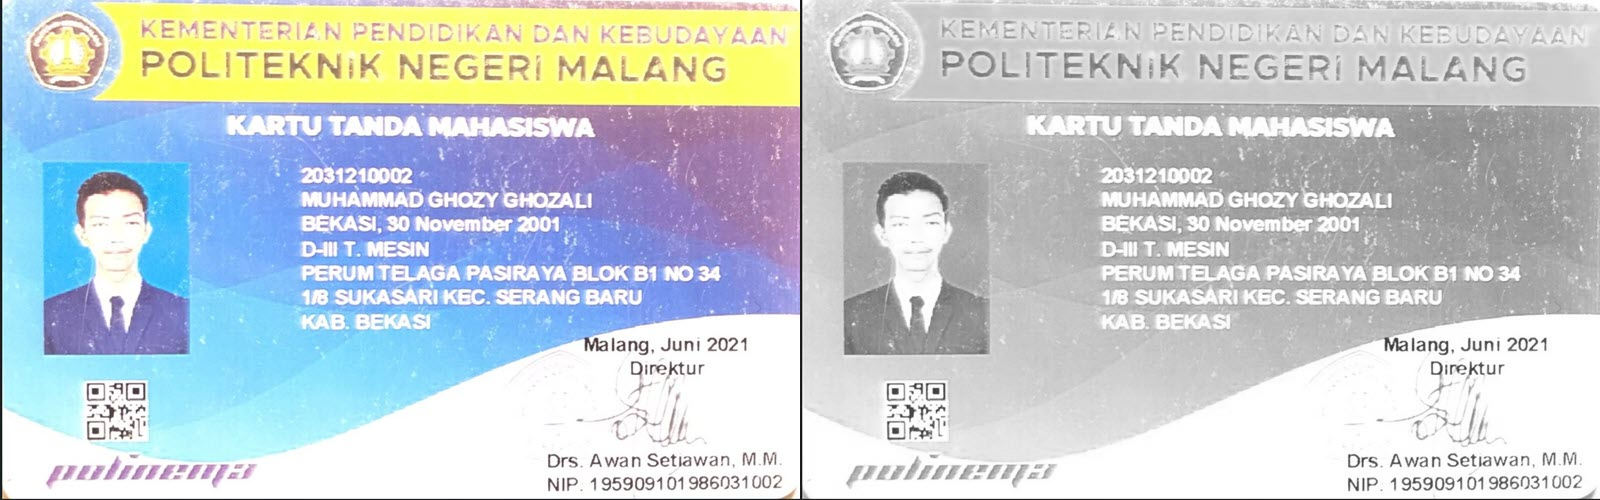

b. Lightness


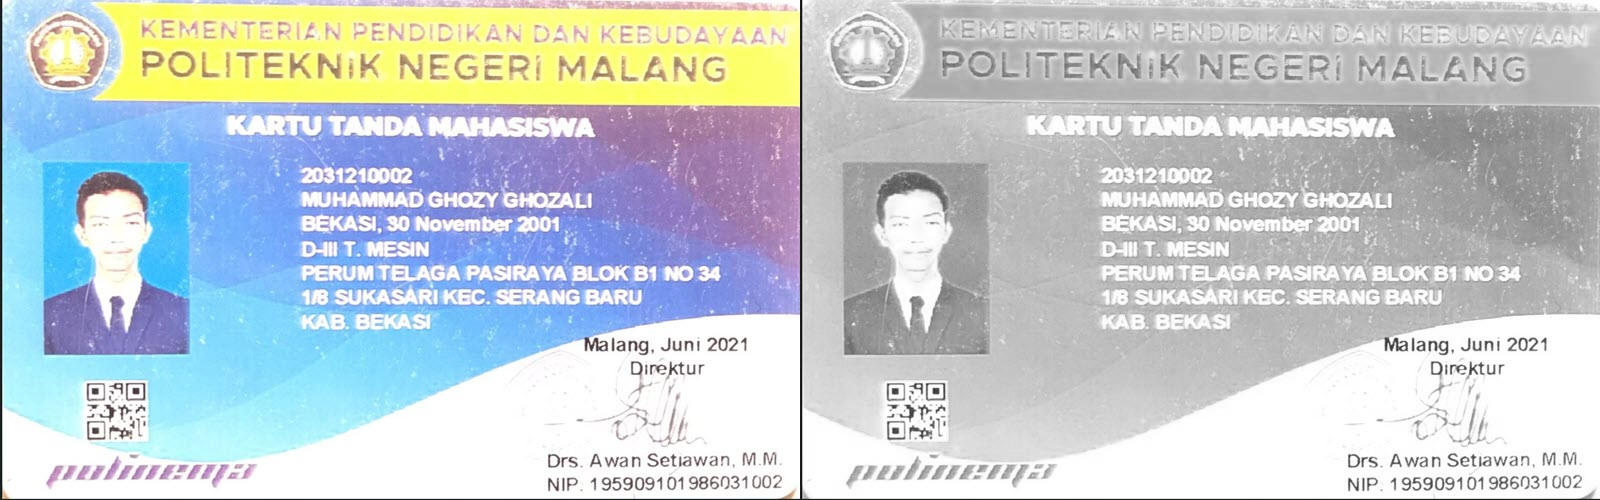

c. Luminance


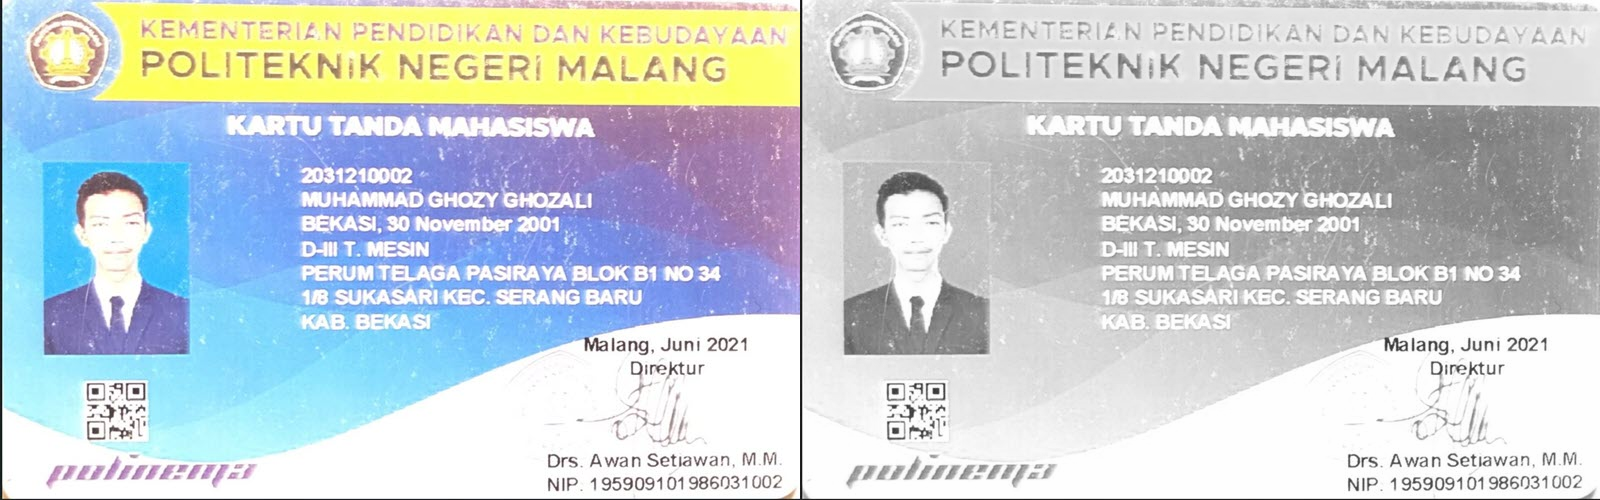

In [ ]:
print('4. Konversi ke Grayscale (Averaging, Lightness, Luminance)')
print('----------------------------------------------------------')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/KTM lama.jpg')

# Buat array kosong untuk tiap metode
gray_avg = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gray_light = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gray_lumi = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Loop per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    R, G, B = img[y, x]

    # Averaging
    gray_avg[y, x] = np.clip((int(R) + int(G) + int(B)) / 3, 0, 255)
    # Lightness
    gray_light[y, x] = np.clip((int(max(R, G, B)) + int(min(R, G, B))) / 2, 0, 255)
    # Luminance
    gray_lumi[y, x] = np.clip(0.21*int(R) + 0.72*int(G) + 0.07*int(B), 0, 255)

# Gabungkan hasil dengan citra asli
final_avg   = cv.hconcat([img, cv.cvtColor(gray_avg, cv.COLOR_GRAY2BGR)])
final_light = cv.hconcat([img, cv.cvtColor(gray_light, cv.COLOR_GRAY2BGR)])
final_lumi  = cv.hconcat([img, cv.cvtColor(gray_lumi, cv.COLOR_GRAY2BGR)])

print("a. Averaging")
cv2_imshow(final_avg)

print("b. Lightness")
cv2_imshow(final_light)

print("c. Luminance")
cv2_imshow(final_lumi)


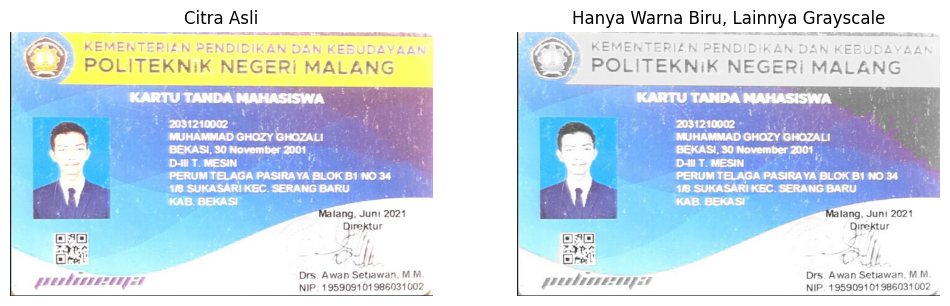

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/KTM lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke HSV agar lebih mudah mendeteksi warna biru
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru (hue sekitar 100-140)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([140, 255, 255])

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Buat citra grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan: jika pixel biru, ambil dari img_rgb, jika tidak ambil dari gray_bgr
result = np.where(mask[:, :, np.newaxis] == 255, img_rgb, gray_bgr)

# Tampilkan hasil
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Warna Biru, Lainnya Grayscale")
plt.axis("off")

plt.show()


PERCOBAAN D2

Gamma Correction pada citra 
----------------------------
Masukkan nilai Gamma: 3


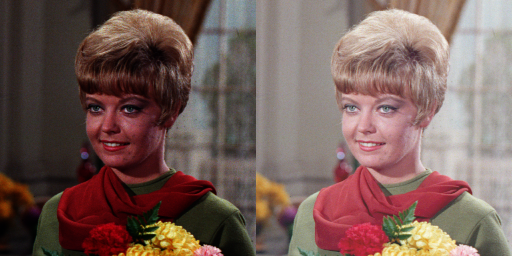

In [17]:
print('Gamma Correction pada citra ')
print('----------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')
  gamma = 1.0

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/female.tiff')

# Normalisasi ke [0,1], terapkan gamma correction, lalu skala balik ke [0,255]
gamma_img = np.zeros(img.shape, img.dtype)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      value = 255 * ((img[y, x, c] / 255) ** (1.0 / gamma))
      gamma_img[y, x, c] = np.clip(value, 0, 255)

# cara simple tanpa loop:
# img_norm = img.astype(np.float32) / 255.0
# gamma_img = np.power(img_norm, 1.0 / gamma) * 255
# gamma_img = np.clip(gamma_img, 0, 255).astype(np.uint8)

# Gabungkan hasil
final = cv.hconcat([img, gamma_img])
cv2_imshow(final)


Simulasi Image Depth (Kuantisasi Citra)
----------------------------------------


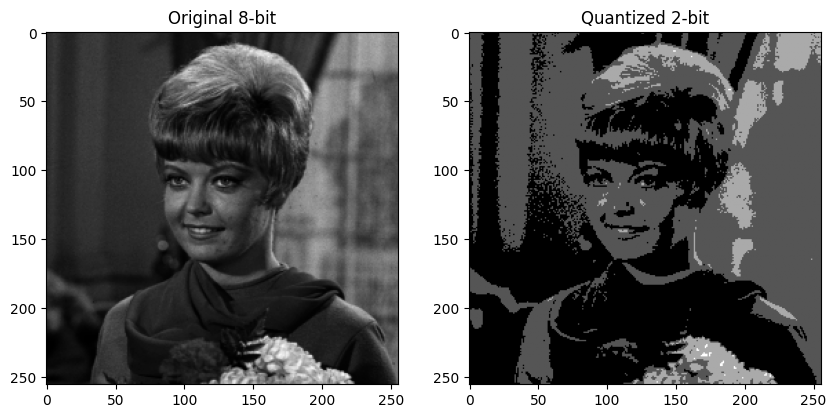

In [21]:
print('Simulasi Image Depth (Kuantisasi Citra)')
print('----------------------------------------')


bit_depth = 2

# Hitung level kuantisasi
level = 255 / (pow(2, bit_depth) - 1)

# Baca gambar grayscale
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/female.tiff', cv.IMREAD_GRAYSCALE)

# Buat citra hasil kuantisasi
quantized = np.zeros(original.shape, dtype=np.uint8)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    value = round(original[y, x] / level) * level
    quantized[y, x] = np.clip(value, 0, 255)

# Tampilkan hasil dengan matplotlib (biar ada sumbu)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original 8-bit')
ax[1].imshow(quantized, cmap='gray')
ax[1].set_title(f'Quantized {bit_depth}-bit')
plt.show()

Average Denoising
-----------------


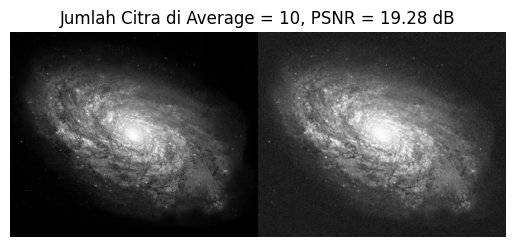

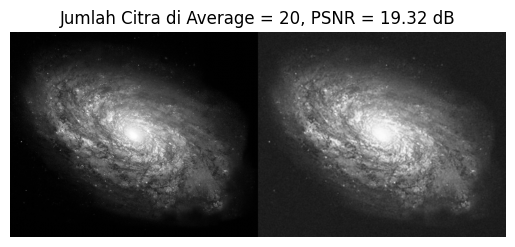

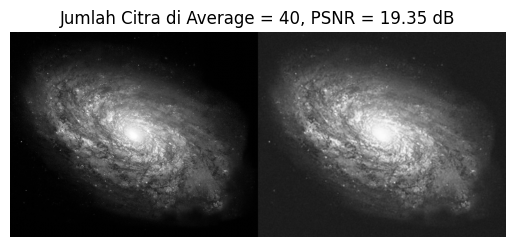

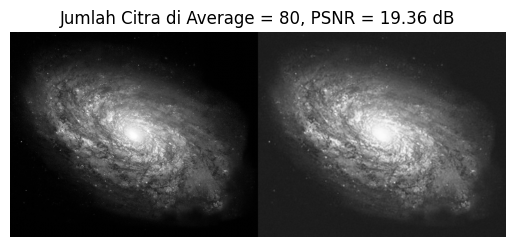

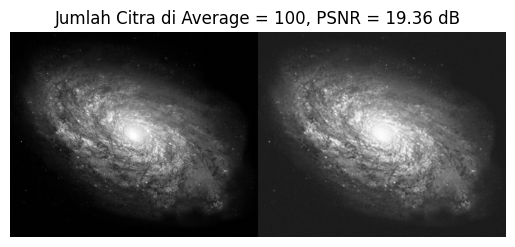

No | Jumlah Citra | PSNR (dB)
--------------------------------
1  | 10           | 19.28
2  | 20           | 19.32
3  | 40           | 19.35
4  | 80           | 19.36
5  | 100          | 19.36


In [26]:
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    return 10 * np.log10((255 ** 2) / mse)

print('Average Denoising')
print('-----------------')

original = cv.imread('/content/galaxy.jpg')
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
h, w = original_gray.shape[:2]

cv_img = []
for file in glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/noises/*.jpg'):
    img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    img_resized = cv.resize(img, (w, h))  # Resize supaya sama dengan original
    cv_img.append(img_resized)

# Uji dengan jumlah rata-rata berbeda
num_list = [10, 20, 40, 80, 100]
psnr_values = []

for n in num_list:
    avg_img = np.zeros_like(original_gray, dtype=np.float32)
    for i in range(n):
        avg_img += cv_img[i].astype(np.float32)
    avg_img = avg_img / n
    avg_img = np.clip(avg_img, 0, 255).astype(np.uint8)

    # Hitung PSNR
    val = psnr(original_gray, avg_img)
    psnr_values.append(val)

    # Tampilkan contoh hasil
    final = cv.hconcat([original_gray, avg_img])
    plt.imshow(final, cmap='gray')
    plt.title(f'Jumlah Citra di Average = {n}, PSNR = {val:.2f} dB')
    plt.axis('off')
    plt.show()

# Cetak tabel hasil
print("No | Jumlah Citra | PSNR (dB)")
print("--------------------------------")
for i, n in enumerate(num_list):
    print(f"{i+1}  | {n:<12} | {psnr_values[i]:.2f}")


Berdasarkan hasil perhitungan PSNR pada tabel, dapat dilihat bahwa semakin banyak citra noisy yang digunakan untuk proses perataan, nilai PSNR menjadi lebih tinggi. Hal ini berarti kualitas citra hasil perataan semakin mendekati citra asli. Dengan demikian, metode average denoising terbukti efektif untuk mereduksi noise acak (seperti Gaussian Noise), karena semakin banyak citra yang dirata-ratakan, distribusi noise akan saling menetralkan.

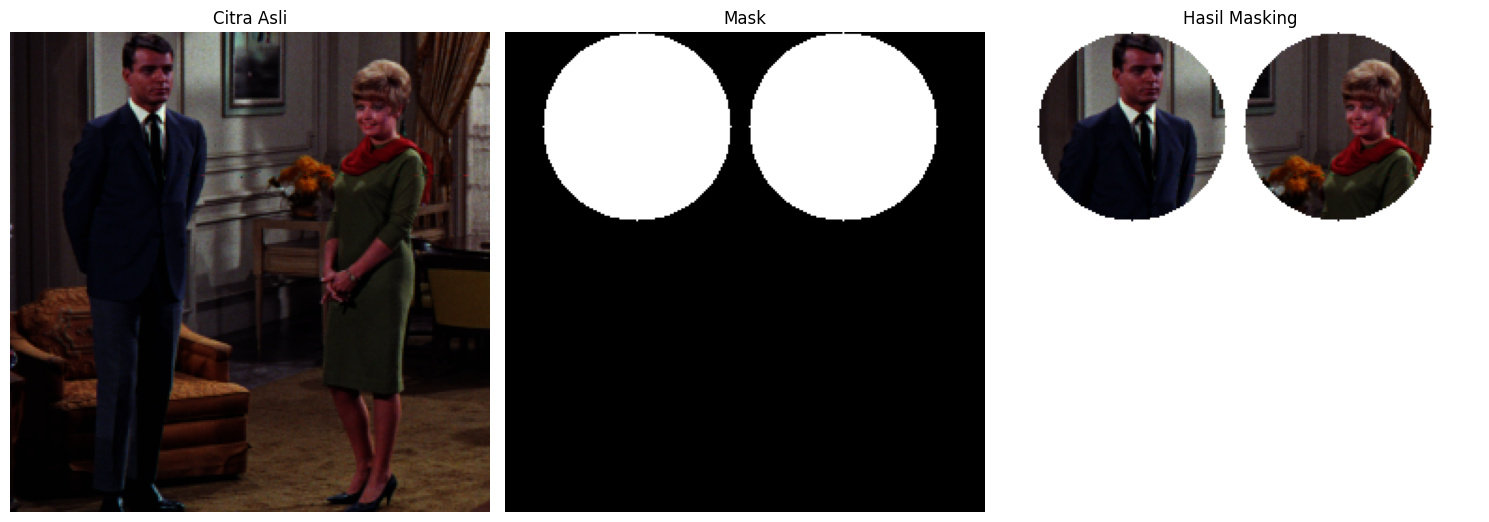

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask hitam dengan ukuran sama (hanya 1 channel)
mask = np.zeros(img.shape[:2], dtype="uint8")

# Tambahkan dua lingkaran pada mask
cv.circle(mask, (70, 50), 50, 255, -1)   # lingkaran kiri
cv.circle(mask, (180, 50), 50, 255, -1)   # lingkaran kanan

# Terapkan mask ke citra (bagian dalam lingkaran tetap berwarna)
masked = cv.bitwise_and(img, img, mask=mask)

# Buat background putih
background = np.ones_like(img, dtype="uint8") * 255
background[mask == 255] = masked[mask == 255]

# Gabungkan semua hasil agar layout sama persis
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(background)
plt.title("Hasil Masking")
plt.axis("off")

plt.tight_layout()
plt.show()

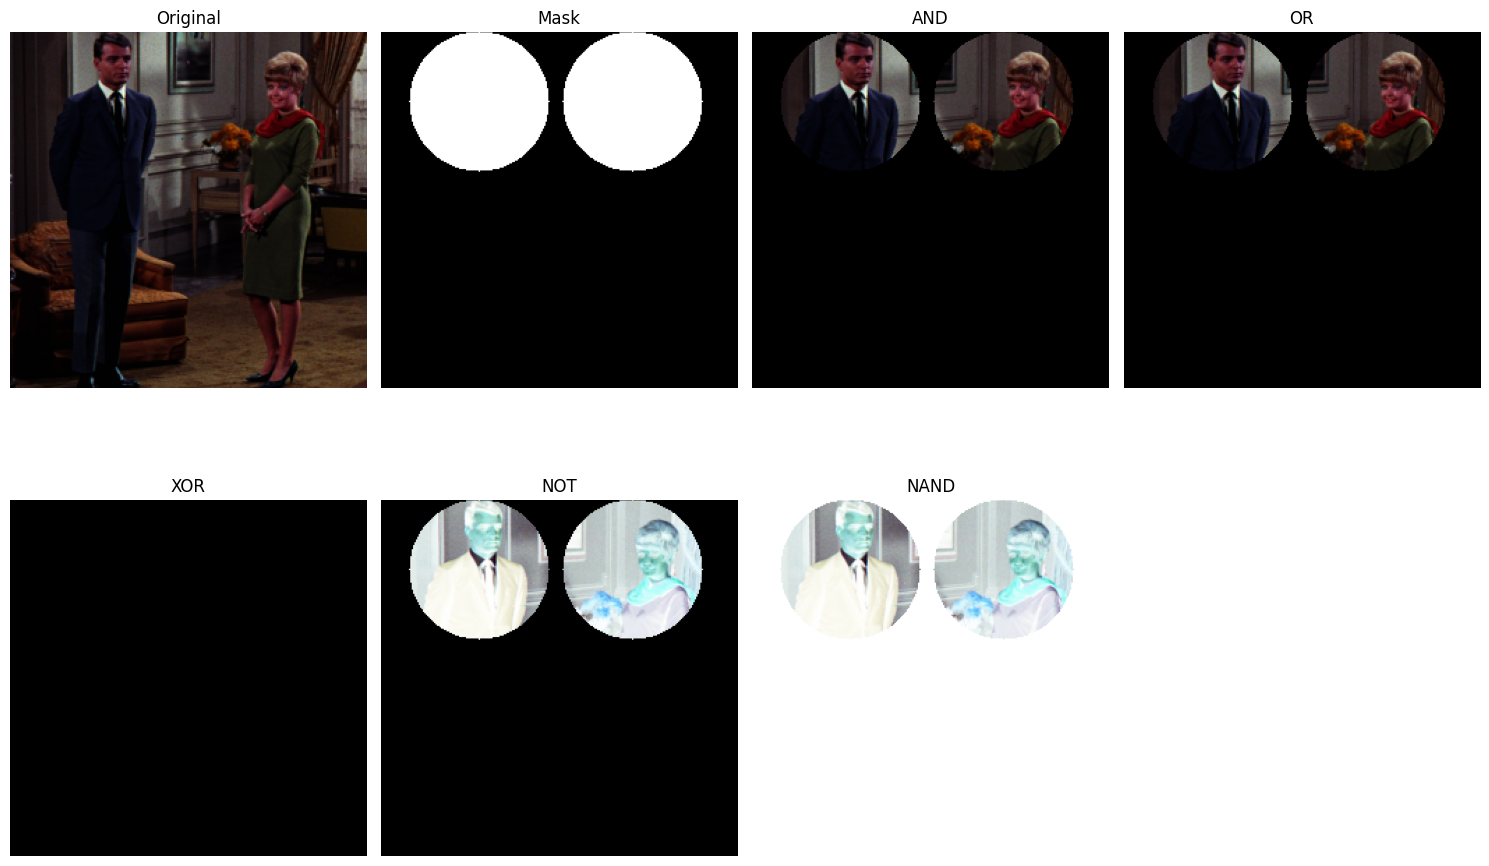

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_07/Gambar Jobsheet 3/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask hitam dengan ukuran sama
mask = np.zeros(img.shape[:2], dtype="uint8")

# Tambahkan dua lingkaran pada mask
cv.circle(mask, (70, 50), 50, 255, -1)   # lingkaran kiri
cv.circle(mask, (180, 50), 50, 255, -1)  # lingkaran kanan

# Hasil bitwise
and_result  = cv.bitwise_and(img, img, mask=mask)
or_result   = cv.bitwise_or(img, img, mask=mask)     # praktis sama dengan AND (area putih muncul)
xor_result  = cv.bitwise_xor(img, img, mask=mask)    # area putih jadi hitam
not_result  = cv.bitwise_not(img, mask=mask)         # komplemen di area mask
nand_result = cv.bitwise_not(and_result)             # NOT dari hasil AND

# Tampilkan semua
titles = ["Original", "Mask", "AND", "OR", "XOR", "NOT", "NAND"]
images = [img, mask, and_result, or_result, xor_result, not_result, nand_result]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if titles[i] == "Mask":
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


1. NOT

- Operator NOT membalik nilai piksel (0 menjadi 255, 255 menjadi 0).

- Hasil: area yang ditutupi mask berubah menjadi kebalikan dari citra asli.

- Wajah di dalam lingkaran tampak seperti efek negatif pada film.

2. OR

- Pada citra dengan mask, OR membuat area putih pada mask menampilkan citra asli.

- Hasilnya mirip dengan AND karena sama-sama menampilkan area putih mask.

- Perbedaannya, jika dua citra berbeda dibandingkan, OR akan menggabungkan area aktif dari keduanya.

3. AND

- AND hanya mempertahankan piksel pada area mask yang berwarna putih.

- Hasil: wajah di dalam lingkaran tetap seperti citra asli, sedangkan area di luar menjadi hitam.

- Operator ini sering digunakan untuk proses masking.

4. NAND

- NAND adalah kebalikan dari AND.

- Hasil: area di dalam lingkaran menjadi warna kebalikan citra asli, sedangkan bagian luar lingkaran menjadi putih.

- Tampak seperti hasil masking yang dibalik (inverse).

5. XOR

- XOR menghasilkan hitam jika kedua input sama, dan putih jika berbeda.

- Karena citra yang digunakan sama, area di dalam lingkaran menjadi hitam (karena nilainya sama), sedangkan luar lingkaran tetap putih/gelap.

- Hasilnya membuat wajah di dalam lingkaran terlihat hilang.

Berdasarkan pengujian operator logika citra (NOT, OR, AND, NAND, XOR), dapat disimpulkan:

- Operator NOT membalikkan nilai piksel sehingga menghasilkan efek negatif pada area yang dimasking.

- Operator OR menampilkan citra asli pada area mask dan dapat menggabungkan informasi dari dua citra yang berbeda.

- Operator AND efektif untuk proses masking karena hanya mempertahankan bagian citra pada area mask putih.

- Operator NAND memberikan hasil kebalikan dari AND, sehingga cocok untuk membuat efek masking terbalik.

- Operator XOR menghilangkan area yang sama (hitam) dan hanya menampilkan perbedaan antar citra, sehingga dapat digunakan untuk mendeteksi perubahan.